# Bosques Aleatorios

In [1]:
# Carguemos el submodulo ensemble
import sklearn.ensemble
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

In [ ]:
# # Las clases que provee el submodule ensemble :
# 'AdaBoostClassifier',
#  'AdaBoostRegressor',
#  'BaggingClassifier',
#  'BaggingRegressor',
#  'BaseEnsemble',
#  'ExtraTreesClassifier',
#  'ExtraTreesRegressor',
#  'GradientBoostingClassifier',
#  'GradientBoostingRegressor',
#  'HistGradientBoostingClassifier',
#  'HistGradientBoostingRegressor',
#  'IsolationForest',
#  'RandomForestClassifier',
#  'RandomForestRegressor',
#  'RandomTreesEmbedding',
#  'StackingClassifier',
#  'StackingRegressor',
#  'VotingClassifier',
#  'VotingRegressor',

In [35]:
# Modulos basicos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargamos la funcion train_test_split
from sklearn.model_selection import train_test_split

# carguemos el submodulo metrics
from sklearn import metrics

# Construyamos un bosque aleatorio para nuestro un problema de clasificacion
from sklearn.ensemble import RandomForestClassifier

# Dataset
df = pd.read_csv("bank-full.csv",sep = ";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Consideremos construir un primer modelo solo con variables independientes cuantitativas
data1 = df.select_dtypes(include = ["int64"])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [9]:
# Analicemos la columna day
np.sort(data1.day.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [11]:
# Analicemos la columna month
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [12]:
# Remover la columna day (data1) de nuestro estudio :
data1 = data1.drop("day", axis = 1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   pdays     45211 non-null  int64
 5   previous  45211 non-null  int64
dtypes: int64(6)
memory usage: 2.1 MB


In [14]:
# Analicemos a la variables y de df
df.y.value_counts()

,count
y,
no,39922
yes,5289


In [43]:
# Modifiquemos los elementos que componen a la variable dependiente
df.y = df.y.map({
    "no":0,
    "yes":1
})

In [44]:
# Muestro la distribucion de valores en la variable dependiente
df.y.value_counts()

,count
y,
0,39922
1,5289


In [45]:
df_model1 = pd.concat([data1, df.y], axis = 1)
df_model1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   pdays     45211 non-null  int64
 5   previous  45211 non-null  int64
 6   y         45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [27]:
# Valores faltantes
df_model1.isnull().sum()

,0
age,0
balance,0
duration,0
campaign,0
pdays,0
previous,0
y,0


In [34]:
# En vista de la distribucion de valores que tiene la variable dependiente :
  # Data esta desbalanceada

# Estrategia 1 : Construir un dataset donde el numero de observaciones 0 y el numero de
# observaciones 1 sean iguales : De las observaciones con valor 0 (39922) vamos a muestrear
# un tamaño igual a 5289

tmp0 = df_model1.loc[df_model1.y == 0, : ].sample(n = 5289)
tmp1 = df_model1.loc[df_model1.y == 1, ]

df_model1 = pd.concat([tmp0, tmp1], axis = 0)
# df_model1.y.value_counts()

# Eliminemos los elementos temporales
del tmp0
del tmp1


In [37]:
# Construyamos un primer modelo base

# Definamos las variables independientes y la variable dependiente
y = df_model1.y
X = df_model1.drop("y", axis = 1)

# Particionamos nuestro dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size= 0.8)

# Instanciamos el modelo a entrenar
Model1_rf_base = RandomForestClassifier()

# Ajustamos el modelo utilizando el subconjunto de entrenamiento
Model1_rf_base.fit(Xtrain, ytrain)

# Score
R2_Model1_rf_base = Model1_rf_base.score(Xtrain,ytrain)

# Calculo de pronosticos para la variable dependiente
y_pronostico_rf_base = Model1_rf_base.predict(Xtest)

# Calculemos indicadores de calidad :
ACC_rf_base = metrics.accuracy_score(ytest, y_pronostico_rf_base)*100

# Calculemos otro indicador de calidad : AUC
Ratio_FP, Ratio_VP, _ = metrics.roc_curve(ytest, y_pronostico_rf_base)
AUC_rf_base = metrics.auc(Ratio_FP, Ratio_VP) *100

print("""
Modelo Base : Random Forest
  R2 : %.3f
  Accuracy : %.3f
  AUC : %.3f
""" %(R2_Model1_rf_base,ACC_rf_base, AUC_rf_base))



Modelo Base : Random Forest 
  R2 : 1.000
  Accuracy : 78.072
  AUC : 78.071



In [46]:
# Implementemos una funcion que seleccionando de manera aleatoria las observaciones 0 de
#  la variable independiente podamos obtener los indicadores de calidad Score, Accuracy y AUC

def AnalisisModel1_RF_Base():
  df_model1 = pd.concat([data1, df.y], axis = 1)

  tmp0 = df_model1.loc[df_model1.y == 0, : ].sample(n = 5289)
  tmp1 = df_model1.loc[df_model1.y == 1, ]

  df_model1 = pd.concat([tmp0, tmp1], axis = 0)
  # df_model1.y.value_counts()

  # Eliminemos los elementos temporales
  del tmp0
  del tmp1

  # Definamos las variables independientes y la variable dependiente
  y = df_model1.y
  X = df_model1.drop("y", axis = 1)

  # Particionamos nuestro dataset
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size= 0.8)

  # Instanciamos el modelo a entrenar
  Model1_rf_base = RandomForestClassifier()

  # Ajustamos el modelo utilizando el subconjunto de entrenamiento
  Model1_rf_base.fit(Xtrain, ytrain)

  # Score
  R2_Model1_rf_base = Model1_rf_base.score(Xtrain,ytrain)

  # Calculo de pronosticos para la variable dependiente
  y_pronostico_rf_base = Model1_rf_base.predict(Xtest)

  # Calculemos indicadores de calidad :
  ACC_rf_base = metrics.accuracy_score(ytest, y_pronostico_rf_base)*100

  # Calculemos otro indicador de calidad : AUC
  Ratio_FP, Ratio_VP, _ = metrics.roc_curve(ytest, y_pronostico_rf_base)
  AUC_rf_base = metrics.auc(Ratio_FP, Ratio_VP) *100

  return (R2_Model1_rf_base,ACC_rf_base, AUC_rf_base)




In [48]:
# Realicemos 100 experimentos (Queda como tarea realizar 1500, 3000 y 5000)

ListaR2 = []
ListaAcc = []
ListaAUC = []

for i in range(100):
  r2, acc, auc = AnalisisModel1_RF_Base()
  ListaR2.append(r2)
  ListaAcc.append(acc)
  ListaAUC.append(auc)

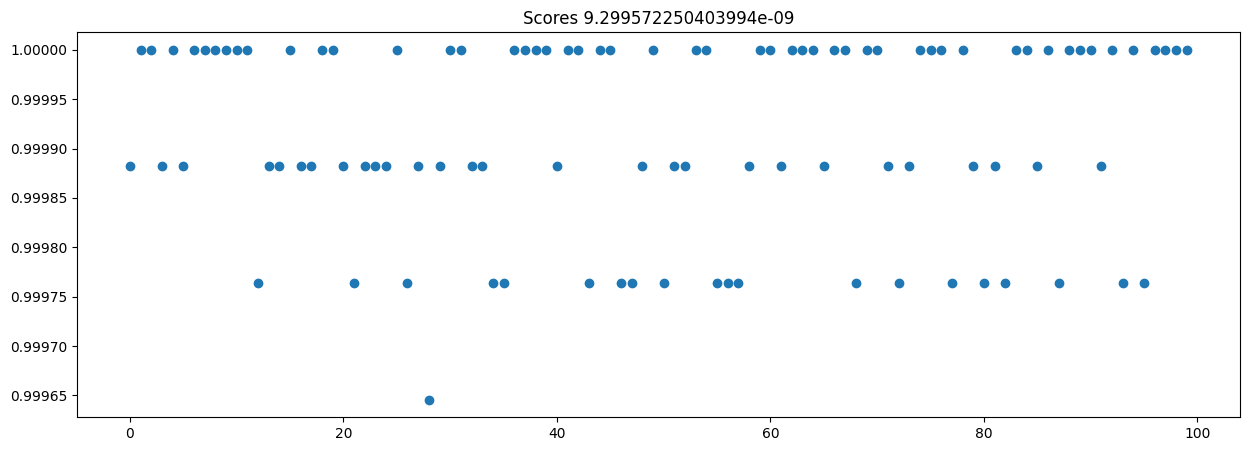

In [49]:
# Mostremos la distribucion de los valores de la lista de scores
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaR2)), y = ListaR2)
plt.title("Scores " + str(np.var(ListaR2)))
plt.show()

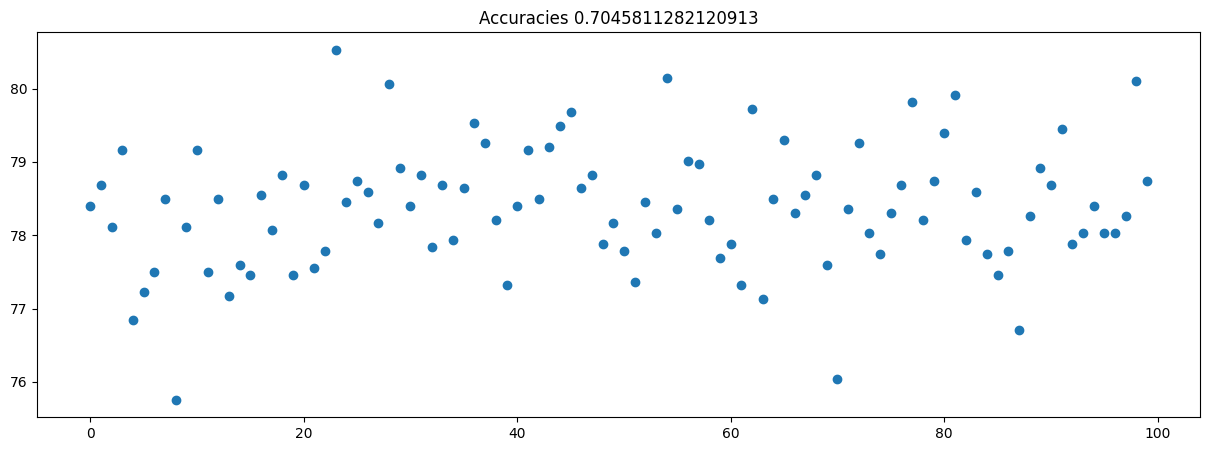

In [50]:
# Mostremos la distribucion de los valores de la lista de Accuracies
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaAcc)), y = ListaAcc)
plt.title("Accuracies " + str(np.var(ListaAcc)))
plt.show()

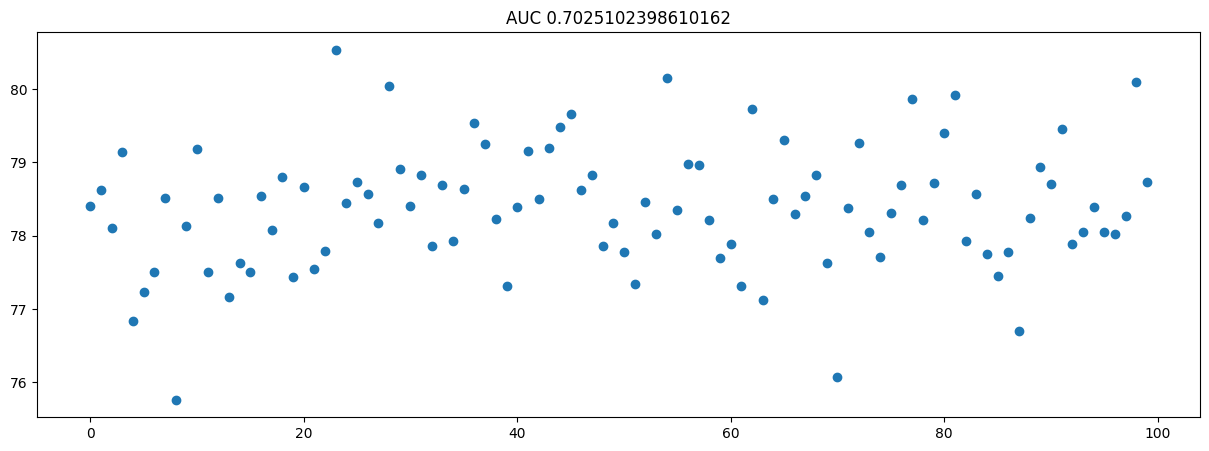

In [51]:
# Mostremos la distribucion de los valores de la lista de AUC
plt.figure(figsize = (15,5))
plt.scatter(x = range(len(ListaAUC)), y = ListaAUC)
plt.title("AUC " + str(np.var(ListaAUC)))
plt.show()

In [52]:
# Documentacion de la clase RandomForestClassifier
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [53]:
# Implementemos una funcion que seleccionando de manera aleatoria las observaciones 0 de
#  la variable independiente podamos obtener los indicadores de calidad Score, Accuracy y AUC

def AnalisisModel1_RF_Base_Ver2(num_arboles):
  df_model1 = pd.concat([data1, df.y], axis = 1)

  tmp0 = df_model1.loc[df_model1.y == 0, : ].sample(n = 5289)
  tmp1 = df_model1.loc[df_model1.y == 1, ]

  df_model1 = pd.concat([tmp0, tmp1], axis = 0)
  # df_model1.y.value_counts()

  # Eliminemos los elementos temporales
  del tmp0
  del tmp1

  # Definamos las variables independientes y la variable dependiente
  y = df_model1.y
  X = df_model1.drop("y", axis = 1)

  # Particionamos nuestro dataset
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size= 0.8)

  # Instanciamos el modelo a entrenar
  Model1_rf_base = RandomForestClassifier(n_estimators = num_arboles)

  # Ajustamos el modelo utilizando el subconjunto de entrenamiento
  Model1_rf_base.fit(Xtrain, ytrain)

  # Score
  R2_Model1_rf_base = Model1_rf_base.score(Xtrain,ytrain)

  # Calculo de pronosticos para la variable dependiente
  y_pronostico_rf_base = Model1_rf_base.predict(Xtest)

  # Calculemos indicadores de calidad :
  ACC_rf_base = metrics.accuracy_score(ytest, y_pronostico_rf_base)*100

  # Calculemos otro indicador de calidad : AUC
  Ratio_FP, Ratio_VP, _ = metrics.roc_curve(ytest, y_pronostico_rf_base)
  AUC_rf_base = metrics.auc(Ratio_FP, Ratio_VP) *100

  return (R2_Model1_rf_base,ACC_rf_base, AUC_rf_base)




In [54]:
# 150 arboles
AnalisisModel1_RF_Base_Ver2(num_arboles= 150)

(1.0, 78.68620037807183, 78.69775702822554)

In [55]:
# 500 arboles
AnalisisModel1_RF_Base_Ver2(num_arboles=500)

(1.0, 79.58412098298678, 79.59636027391753)

In [56]:
# 1000 Arboles
AnalisisModel1_RF_Base_Ver2(num_arboles=1000)

(1.0, 79.96219281663515, 79.94774692127973)

In [57]:
# Lista para el argumento num_arboles
ListaArboles = [200, 400, 600, 1000, 1300, 1500]

ListaAUC_NumArboles = []
for arbol in ListaArboles:
  r2, acc, auc = AnalisisModel1_RF_Base_Ver2(num_arboles=arbol)
  ListaAUC_NumArboles.append(auc)

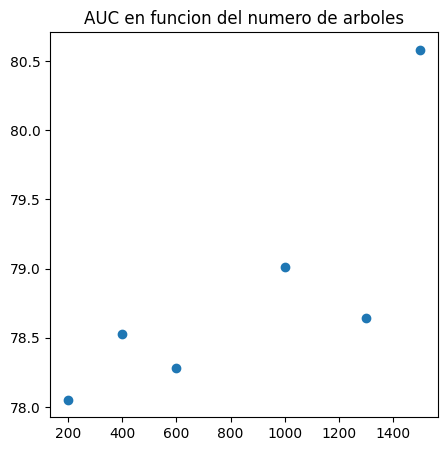

In [60]:
# Mostremos el comportamiento del AUC en funcion del numero de arboles para
# el bosque aleatorio
plt.figure(figsize = (5,5))
plt.scatter(x= ListaArboles, y = ListaAUC_NumArboles)
plt.title("AUC en funcion del numero de arboles")
plt.show()

In [61]:
# Veamos un experimento donde consideramos 10000 arboles
AnalisisModel1_RF_Base_Ver2(num_arboles=10000)

(0.9998818246277476, 78.73345935727788, 78.66770423839104)

In [62]:
help(RandomForestClassifier)

# n_estimators : int, default=100
# criterion : {"gini", "entropy", "log_loss"}, default="gini"
# max_depth : int, default=None
# ccp_alpha : non-negative float, default=0.0


Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [ ]:
# Realicemos un barrido de hiperparametros para este modelo de tipo
# random forest

# Carguemos la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

# Modelo base
ModRFbase_GS = RandomForestClassifier(n_jobs = 1)

# Definamos el diccionario que define el espacio de busqueda
DictHP_RF = {
    "n_estimators" : [1000, 1500, 2000, 3000, 3500, 4000],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth" : [100,200,300,400, 500, 600],
    "ccp_alpha" : np.linspace(0.001, 5, 20)
}

# Configuremos nuestro grid search
ModeloRF_GS = GridSearchCV(estimator = ModRFbase_GS,
                           param_grid = DictHP_RF,
                           cv = 5,
                           n_jobs = -1,
                           scoring = "accuracy")

# Obtengamos los datos a utilizar en el barrido de hiperparametros
df_model1 = pd.concat([data1, df.y], axis = 1)

tmp0 = df_model1.loc[df_model1.y == 0, : ].sample(n = 5289)
tmp1 = df_model1.loc[df_model1.y == 1, ]

df_model1 = pd.concat([tmp0, tmp1], axis = 0)
# df_model1.y.value_counts()

# Eliminemos los elementos temporales
del tmp0
del tmp1

# Definamos las variables independientes y la variable dependiente
y = df_model1.y
X = df_model1.drop("y", axis = 1)

# Particionamos nuestro dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size= 0.8)



# Ajustemos todos los modelos configurados por el grid search
HistoriaAjuste = ModeloRF_GS.fit(Xtrain, ytrain)